In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bats
import time
import hera_tda as hera

In [2]:
def barcodes_identical(ps0, ps1):
    ident = True
    for p, q in zip(ps0, ps1):
        ident = ident and\
        p.dim() == q.dim() and\
        p.birth() == q.birth() and\
        p.death() == q.death() and\
        p.birth_ind() == q.birth_ind() and\
        p.death_ind() == q.death_ind()
        
    return ident

def bottleneck_max(ps0, ps1, dmax=1):
    dist = 0
    for dim in range(dmax+1):
        ps0a = [p for p in ps0 if p.dim() == dim and p.length() > 0]
        ps1a = [p for p in ps1 if p.dim() == dim and p.length() > 0]
        dist += hera.BottleneckDistance(ps0a, ps1a)[0]
        
    return dist


def normalized_kt(U, X):
    """
    Compute normalized kendall-tau distance given update information U and starting filtration X
    """
    k = 0
    maxk = 0
    for d in range(X.maxdim() + 1):
        nd = X.ncells(d)
        maxk += (nd * (nd - 1)) // 2
        k += U.kendall_tau_dists[d]
        
    return k / maxk

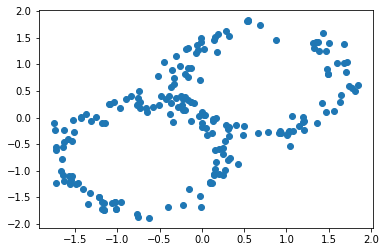

In [3]:
def gen_fig_8(n, r=1.0, sigma=0.1):
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X, axis=1).reshape(-1,1)
    X += sigma*np.random.randn(n, 2) + np.random.choice([-1/np.sqrt(2),1/np.sqrt(2)], size=(n,1))
    return X

np.random.seed(0)
n = 200
X = gen_fig_8(n)
noise = np.random.normal(size=X.shape)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# build filtration
r = np.inf
Y = X + 0.1*noise
t0 = time.monotonic()
R0 = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), r, 2)
t1 = time.monotonic()
print(t1 - t0)

t0 = time.monotonic()
R1 = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(Y)), bats.Euclidean(), r, 2)
t1 = time.monotonic()
print(t1 - t0)

0.4518757089972496
0.41642790799960494


In [5]:
degree = -1
t0 = time.monotonic()
DG0 = bats.FilteredF2DGVectorSpace(R0, degree)
RC0 = bats.ReducedFilteredF2DGVectorSpace(DG0, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
t1 = time.monotonic()
print("R0: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
DG1 = bats.FilteredF2DGVectorSpace(R1, degree)
RC1 = bats.ReducedFilteredF2DGVectorSpace(DG1, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
t1 = time.monotonic()
print("R1: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
U = bats.UpdateInfo2(R0, R1)
t1 = time.monotonic()
print("find UpdatInfo: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
RC0.update(U)
t1 = time.monotonic()
print("update: {:.2f} sec.".format(t1 - t0))

ps0 = RC0.persistence_pairs(0) + RC0.persistence_pairs(1)
ps1 = RC1.persistence_pairs(0) + RC1.persistence_pairs(1)

print("bottleneck dist =", bottleneck_max(ps0, ps1))

R0: 5.24 sec.
R1: 4.84 sec.
find UpdatInfo: 0.36 sec.
update: 0.85 sec.
bottleneck dist = 0.0


In [6]:
degree = +1
t0 = time.monotonic()
DG0 = bats.FilteredF2DGVectorSpace(R0, degree)
RC0 = bats.ReducedFilteredF2DGVectorSpace(DG0, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
t1 = time.monotonic()
print("R0: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
DG1 = bats.FilteredF2DGVectorSpace(R1, degree)
RC1 = bats.ReducedFilteredF2DGVectorSpace(DG1, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
t1 = time.monotonic()
print("R1: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
U = bats.UpdateInfo2(R0, R1)
t1 = time.monotonic()
print("find UpdatInfo: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
RC0.update(U)
t1 = time.monotonic()
print("update: {:.2f} sec.".format(t1 - t0))

ps0 = RC0.persistence_pairs(0) + RC0.persistence_pairs(1)
ps1 = RC1.persistence_pairs(0) + RC1.persistence_pairs(1)

print("bottleneck dist =", bottleneck_max(ps0, ps1))

R0: 1.22 sec.
R1: 1.20 sec.
find UpdatInfo: 0.36 sec.
update: 0.23 sec.
bottleneck dist = 0.0


In [7]:
def get_update_filt(F0, F1):
    X0 = F0.complex()
    X1 = F1.complex()
    
    newvals = []
    for d in range(F0.maxdim() + 1):
        newvals.append(list())
        vals1 = F1.vals(d)
        for s in X0.get_simplices(d):
            s1 = X1.find_idx(s)
            newvals[d].append(vals1[s1])
            
    return newvals

degree = +1
t0 = time.monotonic()
DG0 = bats.FilteredF2DGVectorSpace(R0, degree)
RC0 = bats.ReducedFilteredF2DGVectorSpace(DG0, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
t1 = time.monotonic()
print("R0: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
DG1 = bats.FilteredF2DGVectorSpace(R1, degree)
RC1 = bats.ReducedFilteredF2DGVectorSpace(DG1, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
t1 = time.monotonic()
print("R1: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
newvals = get_update_filt(R0, R1)
# U = bats.UpdateInfo2(R0, R1)
t1 = time.monotonic()
print("find UpdatInfo: {:.2f} sec.".format(t1 - t0))

t0 = time.monotonic()
# RC0.update(U)
RC0.update_filtration(newvals)
t1 = time.monotonic()
print("update: {:.2f} sec.".format(t1 - t0))

ps0 = RC0.persistence_pairs(0) + RC0.persistence_pairs(1)
ps1 = RC1.persistence_pairs(0) + RC1.persistence_pairs(1)

print("bottleneck dist =", bottleneck_max(ps0, ps1))

R0: 0.85 sec.
R1: 0.87 sec.
find UpdatInfo: 2.52 sec.
update: 0.57 sec.
bottleneck dist = 0.0


Cohomology+clearing works very well on full Rips filtration (inf radius) as claimed in papers. However update on cohomology is twice slower.

In [8]:
def find_kt(U):
    kts = []
    for p in U.perm:
        kts.append(bats.kendall_tau(p))
    return sum(kts)

In [9]:
find_kt(U)

46901189521

In [10]:
def compare_time_kt(X, Y, degree = -1):
    # somehow homology update is faster 
    r = np.inf
    R0 = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), r, 2)
    R1 = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(Y)), bats.Euclidean(), r, 2)
    
    t0 = time.monotonic()
    DG0 = bats.FilteredF2DGVectorSpace(R0, degree)
    RC0 = bats.ReducedFilteredF2DGVectorSpace(DG0, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
    t1 = time.monotonic()
    print("R0: {:.2f} sec.".format(t1 - t0))

    t0 = time.monotonic()
    DG1 = bats.FilteredF2DGVectorSpace(R1, degree)
    RC1 = bats.ReducedFilteredF2DGVectorSpace(DG1, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
    t1 = time.monotonic()
    print("R1: {:.2f} sec.".format(t1 - t0))

    t0 = time.monotonic()
    U = bats.UpdateInfo2(R0, R1)
    t1 = time.monotonic()
    print("find UpdatInfo: {:.2f} sec.".format(t1 - t0))
    kts = find_kt(U)

    t0 = time.monotonic()
    RC0.update(U)
    t1 = time.monotonic()
    print("update: {:.2f} sec.".format(t1 - t0))
    upd_time = t1 - t0
    
    return upd_time, kts


In [18]:
n_rep = 5
kt_list = []
up_time = []
std_lists = [1e-2, 3e-2, 5e-2, 7e-2, 9e-2, 0.1, 0.2, 0.3, 0.4, 0.5]
# std_lists = [0.1, 0.2]
for i in range(n_rep):
    for std in std_lists:
        noise = np.random.normal(scale = std, size=X.shape)
        Y = X + noise
        t, kts = compare_time_kt(X,Y,-1)
        up_time.append(t)
        kt_list.append(kts)

R0: 5.07 sec.
R1: 4.86 sec.
find UpdatInfo: 0.35 sec.
update: 0.58 sec.
R0: 5.10 sec.
R1: 4.72 sec.
find UpdatInfo: 0.33 sec.
update: 0.64 sec.
R0: 4.70 sec.
R1: 5.30 sec.
find UpdatInfo: 0.33 sec.
update: 0.66 sec.
R0: 4.90 sec.
R1: 4.64 sec.
find UpdatInfo: 0.34 sec.
update: 0.74 sec.
R0: 4.77 sec.
R1: 4.11 sec.
find UpdatInfo: 0.37 sec.
update: 0.75 sec.
R0: 4.78 sec.
R1: 4.77 sec.
find UpdatInfo: 0.33 sec.
update: 0.81 sec.
R0: 4.95 sec.
R1: 6.77 sec.
find UpdatInfo: 0.42 sec.
update: 1.61 sec.
R0: 5.10 sec.
R1: 7.41 sec.
find UpdatInfo: 0.40 sec.
update: 3.29 sec.
R0: 4.98 sec.
R1: 9.44 sec.
find UpdatInfo: 0.42 sec.
update: 7.72 sec.
R0: 4.99 sec.
R1: 4.71 sec.
find UpdatInfo: 0.43 sec.
update: 3.47 sec.
R0: 4.58 sec.
R1: 4.47 sec.
find UpdatInfo: 0.34 sec.
update: 0.53 sec.
R0: 4.92 sec.
R1: 4.54 sec.
find UpdatInfo: 0.33 sec.
update: 0.73 sec.
R0: 5.21 sec.
R1: 5.33 sec.
find UpdatInfo: 0.39 sec.
update: 0.78 sec.
R0: 4.88 sec.
R1: 4.92 sec.
find UpdatInfo: 0.35 sec.
update: 0.

In [19]:
rec = [kt_list, up_time]

import pandas as pd
df = pd.DataFrame(rec)
df.to_csv('rec.csv', index=False)

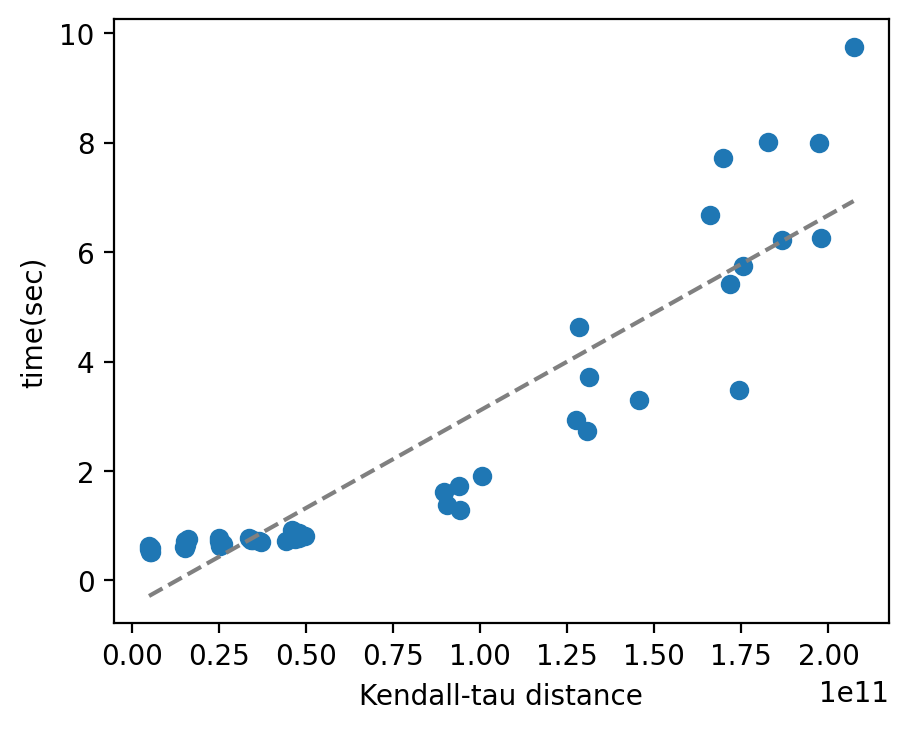

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df2 = pd.read_csv('rec.csv')
a = df2.to_numpy()

# plt.xscale('log')
# plt.yscale('log')

plt.figure(figsize=(5, 4), dpi=200)

plt.scatter(a[0], a[1])
m, b = np.polyfit(a[0], a[1], 1)
x = np.sort(a[0])
plt.plot(x, m*x+b, color='grey', linestyle='dashed')
plt.xlabel("Kendall-tau distance")
plt.ylabel("time(sec)")
plt.savefig('rips_perms.pdf', dpi=200, bbox_inches='tight')

In [4]:
np.max(a[0])

207211991394.0